#Some tests to check if your setup is running correctly - Using dynamixel XL320 motor

In [2]:
import pypot.dynamixel
import time

##Low level test

Find the available usb port. The port where USB2AX or USBDynamixel is plug.

In [3]:
print(pypot.dynamixel.get_available_ports())

['COM3']


Open a low level connexion to the motors, don't forget to replace 'COM3' if your port is different.

In [4]:
dxl_io = pypot.dynamixel.Dxl320IO('COM3', use_sync_read=False)

Find the different motors which must have differents id. Id have been set up before with the herborist tool.

In [4]:
print(dxl_io.scan(range(30)))

[1, 2, 3, 4]


A test to check the speed of the communication with your motor. On windows it is possible that you have to change the latency time of the driver of the usbdynamixel (see forum : https://forum.poppy-project.org/t/birth-of-poppy-ergo-jr-and-support-for-low-cost-xl-320-motors/1052/22)

In [7]:
%timeit dxl_io.get_present_position((1, 2, 3, 4))

100 loops, best of 3: 11.5 ms per loop


Setting the robot to 0 position : 

In [8]:
dxl_io.set_goal_position({1: 0})
dxl_io.set_goal_position({2: 0})
dxl_io.set_goal_position({3: 0})
dxl_io.set_goal_position({4: 0})

If you want to close the connexion :

In [10]:
dxl_io.close()

##Config and json file

Now, if you want to have a robot acces and not only motors access, you have to configure your robot.

In [9]:
from pypot.dynamixel import autodetect_robot

my_robot = autodetect_robot()

for m in my_robot.motors:
    m.goal_position = 0.0

In [10]:
my_robot.motors

[<DxlMotor name=motor_1 id=1 pos=0.44>,
 <DxlMotor name=motor_2 id=2 pos=-0.15>,
 <DxlMotor name=motor_3 id=3 pos=-0.73>,
 <DxlMotor name=motor_4 id=4 pos=0.44>]

In [11]:
my_robot.motor_1.goal_position = 0

You can save the configuration in a file :

In [14]:
import json

config = my_robot.to_config()

with open('test.json', 'wb') as f:
    json.dump(config, f)

NameError: name 'my_robot' is not defined

And close the robot :

In [13]:
my_robot.close()

You can use your previous json file to instanciate your robot :

In [11]:
from pypot.robot import from_json

mini_4dof = from_json('test.json')

In [12]:
mini_4dof.motors

[<DxlMotor name=m1 id=1 pos=-0.15>,
 <DxlMotor name=m2 id=2 pos=0.15>,
 <DxlMotor name=m3 id=3 pos=-0.44>,
 <DxlMotor name=m4 id=4 pos=-0.44>]

And make move your robot :

In [13]:
for m in mini_4dof.motors:
    m.compliant=False
    m.goto_position(0,1)

In [13]:
mini_4dof.m4.goto_position(90,0.5)

In [14]:
mini_4dof.m4.goto_position(-90,0.5)

In [15]:
mini_4dof.m3.goto_position(-10,0.5)

In [16]:
mini_4dof.m3.goto_position(90,0.5)

In [17]:
mini_4dof.m4.goto_position(90,0.5)
mini_4dof.m4.goto_position(-90,0.5)

In [15]:
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
from pypot.primitive import Primitive

class graph_primitive(Primitive):
    def setup(self):
        self.m4 = []
        self.m3 = []
        self.load = []
        self.m2 = []
        self.t = []
        self.temoin=[]
        self.a=1
            
    def run(self):
        while not self.should_stop():
            self.m4.append(mini_4dof.m4.present_position)
            self.m3.append(mini_4dof.m3.present_position)
            self.m2.append(mini_4dof.m2.present_position)
            self.load.append(mini_4dof.m2.present_load)
            self.t.append(time.time())
            if self.a==1 :
                self.a=-1
            else :
                self.a=1
            self.temoin.append(self.a)
            time.sleep(0.02)

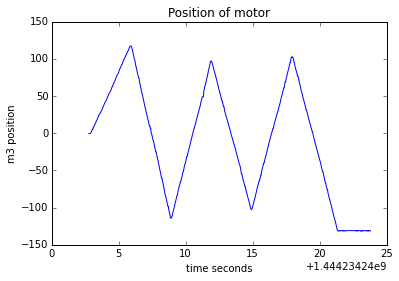

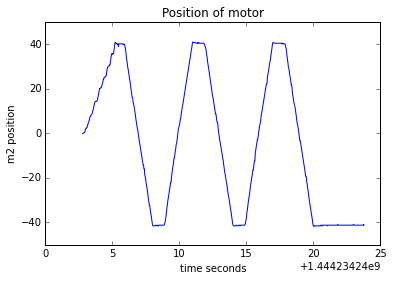

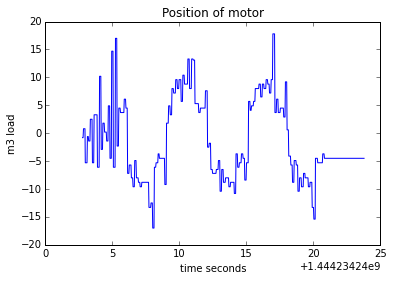

In [16]:
graph = graph_primitive(mini_4dof)
graph.start()

mini_4dof.m2.goto_position(40,2)
mini_4dof.m4.goto_position(90,2)
mini_4dof.m3.goto_position(130,3,wait=True)
mini_4dof.m2.goto_position(-40,2)
mini_4dof.m4.goto_position(-90,2)
mini_4dof.m3.goto_position(-130,3,wait=True)
mini_4dof.m2.goto_position(40,2)
mini_4dof.m4.goto_position(90,2)
mini_4dof.m3.goto_position(130,3,wait=True)
mini_4dof.m2.goto_position(-40,2)
mini_4dof.m4.goto_position(-90,2)
mini_4dof.m3.goto_position(-130,3,wait=True)
mini_4dof.m2.goto_position(40,2)
mini_4dof.m4.goto_position(90,2)
mini_4dof.m3.goto_position(130,3,wait=True)
mini_4dof.m2.goto_position(-40,2)
mini_4dof.m4.goto_position(-90,2)
mini_4dof.m3.goto_position(-130,3,wait=True)

time.sleep(3)
graph.stop()

figure(1)            
plot(graph.t,graph.m3)
xlabel('time seconds')
ylabel('m3 position')
title ('Position of motor')
figure(2)
plot(graph.t,graph.m2)
xlabel('time seconds')
ylabel('m2 position')
title ('Position of motor')
figure(3)
plot(graph.t,graph.load)
xlabel('time seconds')
ylabel('m3 load')
title ('Position of motor')

In [16]:
mini_4dof.m3.goal_position = 20

In [17]:
mini_4dof.close()

##Robot class

If you have correctly set your robot as a poppy creature you just have to import the class and instanciate your robot :

In [1]:
from poppy.creatures import Poppy4dofArmMini

poppy-ergo-jr poppy_ergo_jr PoppyErgoJr
poppy-humanoid poppy_humanoid PoppyHumanoid
poppy-torso poppy_torso PoppyTorso
poppy-4dof-arm-mini poppy_4dof_arm_mini Poppy4dofArmMini


To know what poppy creature are installed on your computer :

To check what is installed on your computer. You have to find the name of your creature.

In [1]:
import pip
pip.get_installed_distributions() 

[pyserial 2.7 (c:\python27\lib\site-packages\pyserial-2.7-py2.7-win32.egg),
 ipython 3.0.0-b1 (c:\python27\lib\site-packages\ipython-3.0.0_b1-py2.7.egg),
 zerorpc 0.4.4 (c:\python27\lib\site-packages\zerorpc-0.4.4-py2.7.egg),
 pyzmq 14.5.0 (c:\python27\lib\site-packages\pyzmq-14.5.0-py2.7-win32.egg),
 tornado 4.1 (c:\python27\lib\site-packages\tornado-4.1-py2.7-win32.egg),
 bottle 0.12.8 (c:\python27\lib\site-packages\bottle-0.12.8-py2.7.egg),
 mistune 0.5 (c:\python27\lib\site-packages\mistune-0.5-py2.7.egg),
 mock 1.0.1 (c:\python27\lib\site-packages\mock-1.0.1-py2.7.egg),
 nose 1.3.4 (c:\python27\lib\site-packages\nose-1.3.4-py2.7.egg),
 requests 2.5.1 (c:\python27\lib\site-packages\requests-2.5.1-py2.7.egg),
 jinja2 2.7.3 (c:\python27\lib\site-packages\jinja2-2.7.3-py2.7.egg),
 jsonschema 2.4.0 (c:\python27\lib\site-packages\jsonschema-2.4.0-py2.7.egg),
 numpydoc 0.5 (c:\python27\lib\site-packages\numpydoc-0.5-py2.7.egg),
 pygments 2.0.2 (c:\python27\lib\site-packages\pygments-2.0.

In [2]:
installed_poppy_creatures_packages()

NameError: name 'installed_poppy_creatures_packages' is not defined

In [ ]:
poppy = Poppy4dofArmMini()

In [52]:
poppy.motors

[<DxlMotor name=m1 id=1 pos=-0.44>,
 <DxlMotor name=m2 id=2 pos=-1.03>,
 <DxlMotor name=m3 id=3 pos=20.67>,
 <DxlMotor name=m4 id=4 pos=-90.76>]

In [ ]:
from pypot.primitive import Primitive

class graph_primitive(Primitive):
    def setup(self):
        self.m4 = []
        self.m3 = []
        self.load = []
        self.m2 = []
        self.t = []
        self.temoin=[]
        self.a=1
            
    def run(self):
        while not self.should_stop():
            self.m4.append(poppy.m4.present_position)
            self.m3.append(poppy.m3.present_position)
            self.m2.append(poppy.m2.present_position)
            self.load.append(poppy.m2.present_load)
            self.t.append(time.time())
            if self.a==1 :
                self.a=-1
            else :
                self.a=1
            self.temoin.append(self.a)
            time.sleep(0.02)

In [ ]:
graph = graph_primitive(poppy)
graph.start()

poppy.m4.goto_position(130,0.5,wait=True)
poppy.m4.goto_position(0,0.5,wait=True)
graph.stop()

figure(1)            
plot(graph.t,graph.m4)
xlabel('time seconds')
ylabel('m3 position')
title ('Position of motor')
figure(2)            
plot(graph.t,graph.temoin)
xlabel('time seconds')
ylabel('m3 position')
title ('Position of motor')

In [53]:
poppy.close()